参考：https://www.soinside.com/question/RVXmV6GAo5Hs4Kj4QrYXTe

In [ ]:
from __future__ import absolute_import,division,print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hyper Parameters
learning_rate=0.01
training_epochs=1000
display_step=50

In [3]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [49]:
print(train_X.shape)
print(train_Y.shape)

(17,)
(17,)


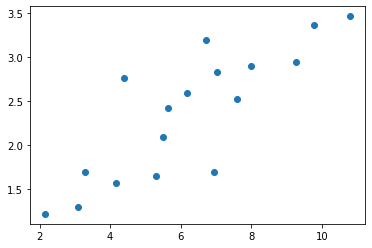

In [4]:
plt.scatter(train_X,train_Y)
plt.show()

In [5]:
print(np.size(train_X))
print(np.size(train_X[0]))
print(np.size(train_Y))
print(n_samples)

17
1
17
17


In [62]:
class Model(object):
    def __init__(self,x,y):
#         self.W = tf.Variable(tf.random.normal((1, 1)))
        self.W = tf.Variable(tf.random.normal((1,)))
        self.b = tf.Variable(tf.random.normal((1,)))
#         self.W = tf.Variable(np.random.randn(),name="weight")  
#         self.b = tf.Variable(np.random.randn(),name="bias")  
        
    def __call__(self,x):
        return self.W*x+self.b
    
def loss(y_pred,y_true):
#     return tf.reduce_sum(tf.square(y_pred-y_true)/(2*n_samples))
    return tf.reduce_sum(tf.pow(y_pred-y_true,2)/(2*n_samples))

In [67]:
model=Model(train_X,train_Y)

In [68]:
optimizer=tf.optimizers.SGD(learning_rate)

def train(model,inputs,outputs):
    for step in range(1,training_epochs+1):
        with tf.GradientTape() as gt:
            current_loss=loss(model(inputs),outputs)

        gradients=gt.gradient(current_loss,[model.W,model.b])
        optimizer.apply_gradients(zip(gradients,[model.W,model.b]))
        
        if step % display_step == 0:
            print('step: %i, loss:%f, W:%f, b:%f'%(step,current_loss,model.W.numpy(),model.b.numpy()))  

In [69]:
train(model,train_X,train_Y)

step: 50, loss:0.210837, W:0.458848, b:-0.670244
step: 100, loss:0.195522, W:0.446639, b:-0.583687
step: 150, loss:0.181959, W:0.435149, b:-0.502229
step: 200, loss:0.169946, W:0.424336, b:-0.425571
step: 250, loss:0.159308, W:0.414160, b:-0.353429
step: 300, loss:0.149886, W:0.404584, b:-0.285539
step: 350, loss:0.141542, W:0.395572, b:-0.221648
step: 400, loss:0.134152, W:0.387091, b:-0.161522
step: 450, loss:0.127608, W:0.379110, b:-0.104939
step: 500, loss:0.121811, W:0.371599, b:-0.051689
step: 550, loss:0.116678, W:0.364531, b:-0.001578
step: 600, loss:0.112132, W:0.357879, b:0.045582
step: 650, loss:0.108106, W:0.351619, b:0.089962
step: 700, loss:0.104540, W:0.345727, b:0.131728
step: 750, loss:0.101382, W:0.340183, b:0.171033
step: 800, loss:0.098585, W:0.334966, b:0.208021
step: 850, loss:0.096109, W:0.330056, b:0.242831
step: 900, loss:0.093915, W:0.325435, b:0.275589
step: 950, loss:0.091972, W:0.321087, b:0.306418
step: 1000, loss:0.090252, W:0.316995, b:0.335429


In [71]:
print(model.W)
print(model.b)
print(model.W*train_X+model.b)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.3169948], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.33542928], dtype=float32)>
tf.Tensor(
[1.381512  1.7302064 2.0789006 2.4624643 2.532203  1.6566637 3.4353213
 2.2950912 2.7414196 1.022357  2.5677063 3.75612   2.0196226 2.8704367
 2.1277177 3.273971  1.3181131], shape=(17,), dtype=float32)


No handles with labels found to put in legend.


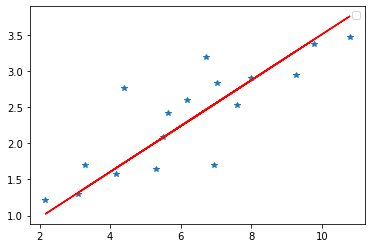

In [72]:
plt.plot(train_X,train_Y,'*')
plt.plot(train_X,np.array(model.W*train_X+model.b),'r')
plt.legend()
plt.show()